In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import pandas as pd
import seaborn as sns
sns.set(style="white")
sns.palette="tab10"
sns.set_style("ticks")

In [2]:
consumption_over_time = pd.read_csv("Data/Consumption_over_time.csv", engine='python')
co2_over_time = pd.read_csv("Data/CO2-emmisions_per_year.csv", engine='python')
headings = ["Million tonnes oil equivalent", "Oil", "Natural Gas", "Coal", 
            "Nuclear energy", "Hydro electric", "Renewables", "Total"]
energy_type_country_2016 = pd.read_csv("Data/2016consumption_by_type.csv", 
                                       names=headings, engine='python')
energy_type_country_2017 = pd.read_csv("Data/2017_consumption_by_type.csv", 
                                       names=headings, engine='python')
nuclear_energy_by_year = pd.read_csv("Data/Nuclear_Energy_By_Year.csv", engine='python')
consuption_by_type_2017 = pd.read_csv("Data/2017_Consumption_By_Country.csv", engine='python')
electricity_2017 = pd.read_csv("Data/Electricity_By_Country_2017.csv", engine='python')

In [3]:
conv2017 = energy_type_country_2017.values
conv2016 = energy_type_country_2016.values
co2_time = co2_over_time.values
consumption = consumption_over_time.values
nuclear_year = nuclear_energy_by_year.values
cons2017 = consuption_by_type_2017.values
electricity_2017 = electricity_2017.values

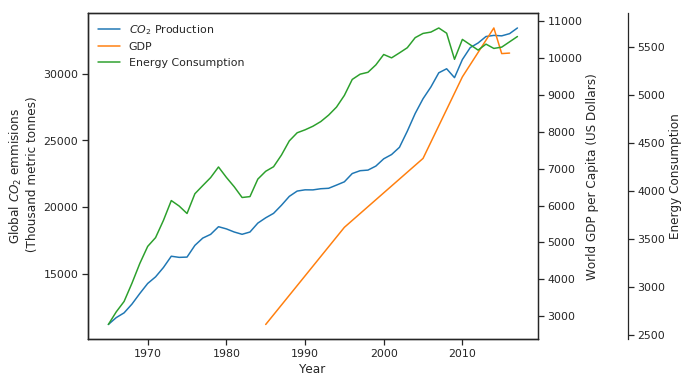

In [4]:
CO2_production = co2_time[107]
Consumption_over_time = consumption[108]


fig, host = plt.subplots(figsize=(10,6))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.2))
par2.spines["right"].set_visible(True)

p1, = host.plot(np.arange(1965, 2018), CO2_production[1:-3], 
                color='#1f77b4', label="$CO_2$ Production")
host.set_ylabel("Global $CO_2$ emmisions\n (Thousand metric tonnes)")

p2, = par1.plot([1985, 1995, 2005, 2010, 2014, 2015,2016], 
                [2775, 5409, 7278, 9489, 10815, 10120, 10134], 
                label="GDP", color='#ff7f0e')
par1.set_ylabel("World GDP per Capita (US Dollars)")

p3, = par2.plot(np.arange(1965, 2018), Consumption_over_time[1:-3], 
                color='#2ca02c', label="Energy Consumption")
par2.set_ylabel("Energy Consumption")

lns = [p1, p2, p3]

host.set_xlabel("Year")
host.legend(handles=lns, frameon=False)
plt.draw()
plt.savefig("Figures/Figure_1", dpi=600)

plt.show()

In [5]:
WORLD2017 = conv2017[82]
WORLD = {"2017": WORLD2017[1:-1], "2017": WORLD2017[1:-1], 
       "labels": ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", 
                  "Renewable"]}

elec = {"2017": [883.0, 5915.3, 9723.4, 2635.6, 4059.9, 2151.5, 182.6], 
       "labels": ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", 
                  "Renewable", "Other"]}

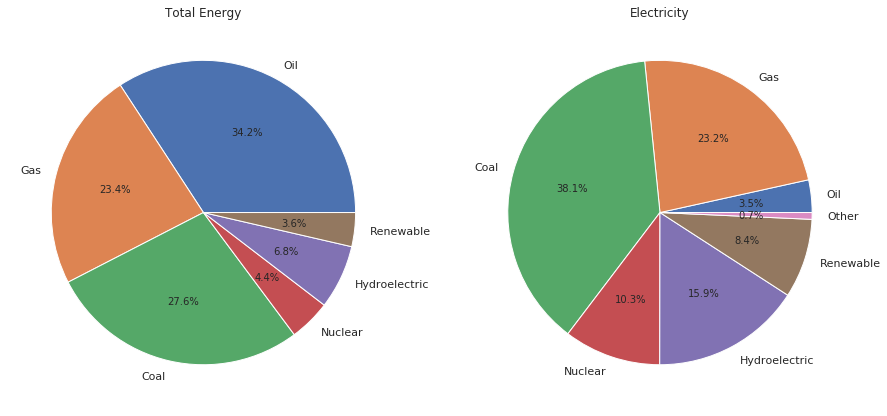

In [6]:
plt.figure(figsize=(15, 7))
ax1 = plt.subplot(1, 2, 1)
ax1.axis("equal")
ax1.set_title("Total Energy")
ax1.pie(WORLD["2017"], labels=WORLD["labels"], autopct="%1.1f%%")

ax2 = plt.subplot(1, 2, 2)
ax2.axis("equal")
ax2.set_title("Electricity")
ax2.pie(elec["2017"], labels=elec["labels"], autopct="%1.1f%%")
plt.savefig("Figures/Figure_2", dpi=600)
plt.show()

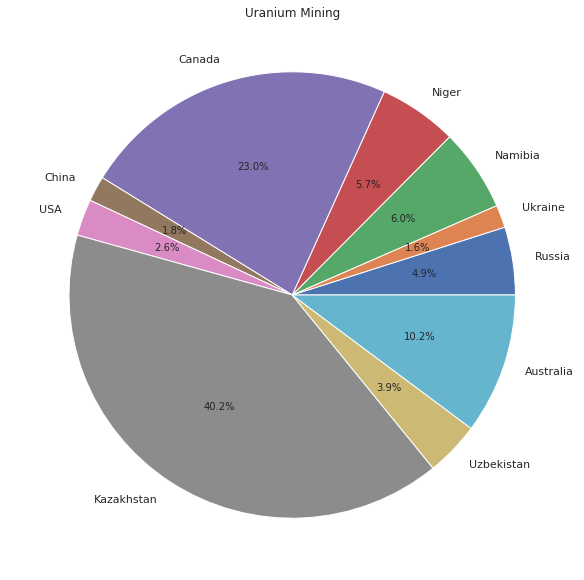

In [7]:
uranium_mining = {"Tonnes": [3005, 1005, 3657, 3478, 14037, 1123,
                             1616, 24575, 2404, 6234], 
       "labels": ["Russia", "Ukraine", "Namibia", "Niger", 
                  "Canada", "China", "USA", "Kazakhstan", 
                  "Uzbekistan", "Australia"]}

fig, ax = plt.subplots(figsize=(10,10))
ax.axis("equal")
ax.set_title("Uranium Mining")
ax.pie(uranium_mining["Tonnes"], labels=uranium_mining["labels"], autopct="%1.1f%%")
plt.savefig("Figures/Figure_3", dpi=600)

plt.show()

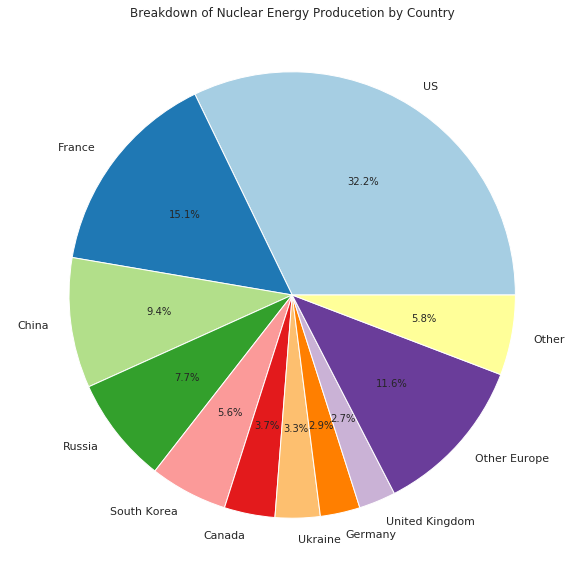

In [8]:
sns.color_palette("Paired")
Total_Generation = np.array([847.3, 398.4, 248.3, 203.1, 148.4, 96.7, 85.6, 75.9, 70.3, 306.11, 152.77])
Countries = np.array(["US", "France", "China", "Russia", "South Korea", "Canada", "Ukraine", 
                      "Germany", "United Kingdom", "Other Europe", "Other"])

fig, ax = plt.subplots(figsize=(10,10))
ax.axis("equal")
ax.set_title("Breakdown of Nuclear Energy Producetion by Country")
ax.pie(Total_Generation, labels=Countries, autopct="%1.1f%%", colors=sns.color_palette("Paired"))

plt.show()

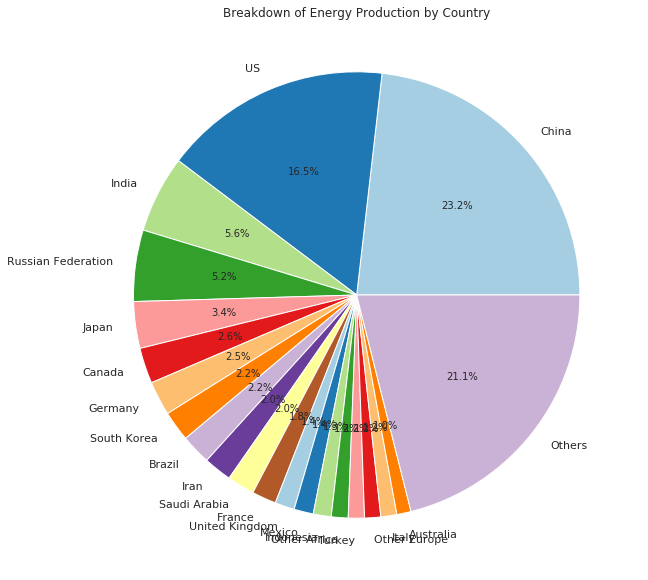

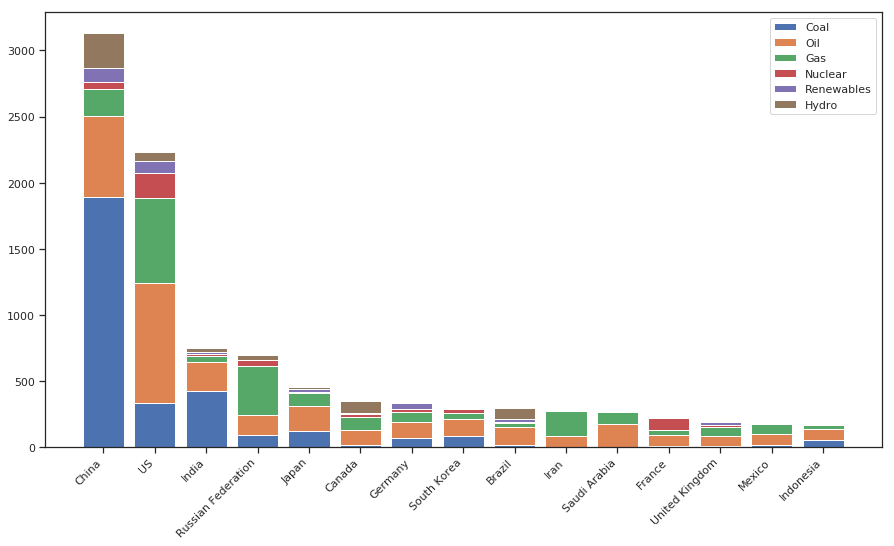

In [9]:
Fossil_Fuel_Percentages = np.array([])
Nuclear_Percentages = np.array([])
Renewables_Percentages = np.array([])
Hydroelectric_Percentages = np.array([])

Fossils = np.array([])
Nuclear = np.array([])
Hydroelectric = np.array([])
Renewables = np.array([])

Coal = np.array([])
Oil = np.array([])
Gas = np.array([])

Countries = np.array([])
Total = np.array([])
for i in range(0, cons2017[:,0].size):
    x = cons2017[i][1:].astype(np.float)
    F = (100 / x[6]) * (x[0]+ x[1] + x[2])
    N = (100 / x[6]) * x[3]
    R = (100 / x[6]) * x[5]
    H = (100 / x[6]) * x[4]
    
    F = np.around(F, decimals=2)
    N = np.around(N, decimals=2)
    R = np.around(R, decimals=2)
    H = np.around(H, decimals=2)
    
    Fossil_Fuel_Percentages = np.append(Fossil_Fuel_Percentages, F)
    Nuclear_Percentages = np.append(Nuclear_Percentages, N)
    Renewables_Percentages = np.append(Renewables_Percentages, R)
    Hydroelectric_Percentages = np.append(Hydroelectric_Percentages, H)

    Fossils = np.append(Fossils, (x[0] + x[1] + x[2]))
    Nuclear = np.append(Nuclear, x[3])
    Hydroelectric = np.append(Hydroelectric, x[4])
    Renewables = np.append(Renewables, x[5])
    Coal = np.append(Coal, x[2])
    Oil = np.append(Oil, x[0])
    Gas = np.append(Gas, x[1])
    
    Countries = np.append(Countries, cons2017[i,0])
    Total = np.append(Total, x[6])
    
    
Percentage_Data = pd.DataFrame({"Countries": Countries, 
                                "Fossil": Fossil_Fuel_Percentages, 
                                "Nuclear": Nuclear_Percentages, 
                                "Renew": Renewables_Percentages,
                                "Hydroelectric": Hydroelectric_Percentages})


Data = pd.DataFrame({"Countries": Countries, 
                     "Fossil": Fossils, 
                     "Coal": Coal,
                     "Oil": Oil,
                     "Gas": Gas,
                     "Nuclear": Nuclear, 
                     "Renew": Renewables,
                     "Hydroelectric": Hydroelectric, 
                     "Total": Total})

Biggest_Total = pd.DataFrame(Data).sort_values('Total', ascending=False)
Biggest_Total = Biggest_Total[:15].copy()
Biggest_Total = Biggest_Total.values

Total_Energy = pd.DataFrame({"Labels": Countries, "Total": Total})
Total_Energy = pd.DataFrame(Total_Energy).sort_values('Total', ascending=False)
df2 = Total_Energy[:20].copy()
new_row = pd.DataFrame(data = {"Labels": ['Others'], "Total": [Total_Energy['Total'][20:].sum()]})
Total_Energy = pd.concat([df2, new_row])
Total_Energy = Total_Energy.values

fig, ax = plt.subplots(figsize=(10,10))
ax.axis("equal")
ax.set_title("Breakdown of Energy Production by Country")
ax.pie(Total_Energy[:,1], labels=Total_Energy[:,0], autopct="%1.1f%%", colors=sns.color_palette("Paired"))

plt.show()

N = np.arange(Biggest_Total[:,0].size)
width = 0.8

plt.figure(figsize=(15, 8))
p1 = plt.bar(N, Biggest_Total[:,2], width)
p2 = plt.bar(N, Biggest_Total[:,3], width, bottom=Biggest_Total[:,2])
p3 = plt.bar(N, Biggest_Total[:,4], width, bottom=(Biggest_Total[:,3]+Biggest_Total[:,2]))
p4 = plt.bar(N, Biggest_Total[:,5], width, bottom=(Biggest_Total[:,3] + Biggest_Total[:,2] + Biggest_Total[:,4]))
p5 = plt.bar(N, Biggest_Total[:,6], width, bottom=(Biggest_Total[:,3]+Biggest_Total[:,2] 
                                              + Biggest_Total[:,4] +Biggest_Total[:,5]))
p6 = plt.bar(N, Biggest_Total[:,7], width, bottom=(Biggest_Total[:,6] + Biggest_Total[:,3]+ Biggest_Total[:,2] 
                                              + Biggest_Total[:,4] +Biggest_Total[:,5]))

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), 
           ('Coal', 'Oil', 'Gas', 'Nuclear', 'Renewables', "Hydro"))
plt.xticks(N, Biggest_Total[:,0], rotation=45, horizontalalignment="right")
plt.tick_params(axis='x')
plt.show()

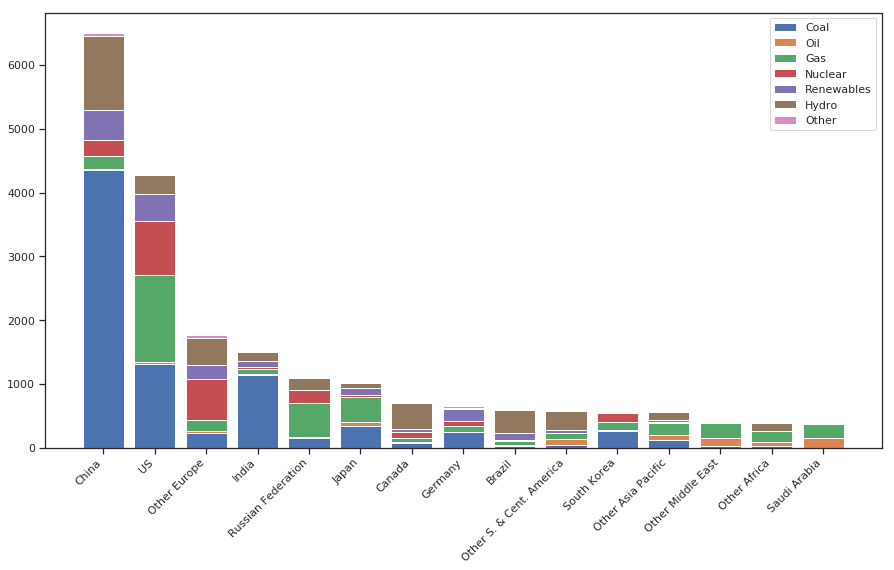

In [10]:
Fossil_Fuel_Percentages = np.array([])
Nuclear_Percentages = np.array([])
Renewables_Percentages = np.array([])
Hydroelectric_Percentages = np.array([])

Fossils = np.array([])
Nuclear = np.array([])
Hydroelectric = np.array([])
Renewables = np.array([])

Coal = np.array([])
Oil = np.array([])
Gas = np.array([])
Other = np.array([])

Countries = np.array([])
Total = np.array([])

for i in range(0, electricity_2017[:,0].size):
    x = electricity_2017[i][1:].astype(np.float)

    F = (100 / x[7]) * (x[0]+ x[1] + x[2])
    N = (100 / x[7]) * x[3]
    R = (100 / x[7]) * x[5]
    H = (100 / x[7]) * x[4]
    
    F = np.around(F, decimals=2)
    N = np.around(N, decimals=2)
    R = np.around(R, decimals=2)
    H = np.around(H, decimals=2)
    
    Fossil_Fuel_Percentages = np.append(Fossil_Fuel_Percentages, F)
    Nuclear_Percentages = np.append(Nuclear_Percentages, N)
    Renewables_Percentages = np.append(Renewables_Percentages, R)
    Hydroelectric_Percentages = np.append(Hydroelectric_Percentages, H)

    Fossils = np.append(Fossils, (x[0] + x[1] + x[2]))
    Nuclear = np.append(Nuclear, x[3])
    Hydroelectric = np.append(Hydroelectric, x[4])
    Renewables = np.append(Renewables, x[5])
    Other= np.append(Other, x[6])
    Coal = np.append(Coal, x[2])
    Oil = np.append(Oil, x[0])
    Gas = np.append(Gas, x[1])
    
    Countries = np.append(Countries, electricity_2017 [i,0])
    Total = np.append(Total, x[7])
    
    
Percentage_Data = pd.DataFrame({"Countries": Countries, 
                                "Fossil": Fossil_Fuel_Percentages, 
                                "Nuclear": Nuclear_Percentages, 
                                "Renew": Renewables_Percentages,
                                "Hydroelectric": Hydroelectric_Percentages})


Data = pd.DataFrame({"Countries": Countries, 
                     "Fossil": Fossils, 
                     "Coal": Coal,
                     "Oil": Oil,
                     "Gas": Gas,
                     "Nuclear": Nuclear, 
                     "Renew": Renewables,
                     "Hydroelectric": Hydroelectric,
                     "Other": Other,
                     "Total": Total})

Biggest_Total = pd.DataFrame(Data).sort_values("Total", ascending=False)
Biggest_Total = Biggest_Total[:15].copy()
Biggest_Total = Biggest_Total.values


N = np.arange(Biggest_Total[:,0].size)
width = 0.8

plt.figure(figsize=(15, 8))
p1 = plt.bar(N, Biggest_Total[:,2], width)
p2 = plt.bar(N, Biggest_Total[:,3], width, bottom=Biggest_Total[:,2])
p3 = plt.bar(N, Biggest_Total[:,4], width, bottom=(Biggest_Total[:,3]+Biggest_Total[:,2]))
p4 = plt.bar(N, Biggest_Total[:,5], width, bottom=(Biggest_Total[:,3] + Biggest_Total[:,2] + Biggest_Total[:,4]))
p5 = plt.bar(N, Biggest_Total[:,6], width, bottom=(Biggest_Total[:,3]+Biggest_Total[:,2] 
                                              + Biggest_Total[:,4] +Biggest_Total[:,5]))
p6 = plt.bar(N, Biggest_Total[:,7], width, bottom=(Biggest_Total[:,6] + Biggest_Total[:,3]+ Biggest_Total[:,2] 
                                              + Biggest_Total[:,4] +Biggest_Total[:,5]))
p7 = plt.bar(N, Biggest_Total[:,8], width, bottom=(Biggest_Total[:,7] + Biggest_Total[:,6] + 
                                              Biggest_Total[:,3]+Biggest_Total[:,2] 
                                              + Biggest_Total[:,4] +Biggest_Total[:,5]))

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]), 
           ('Coal', 'Oil', 'Gas', 'Nuclear', 'Renewables', "Hydro", "Other"))
plt.xticks(N, Biggest_Total[:,0], rotation=45, horizontalalignment="right")
plt.tick_params(axis='x')
plt.show()

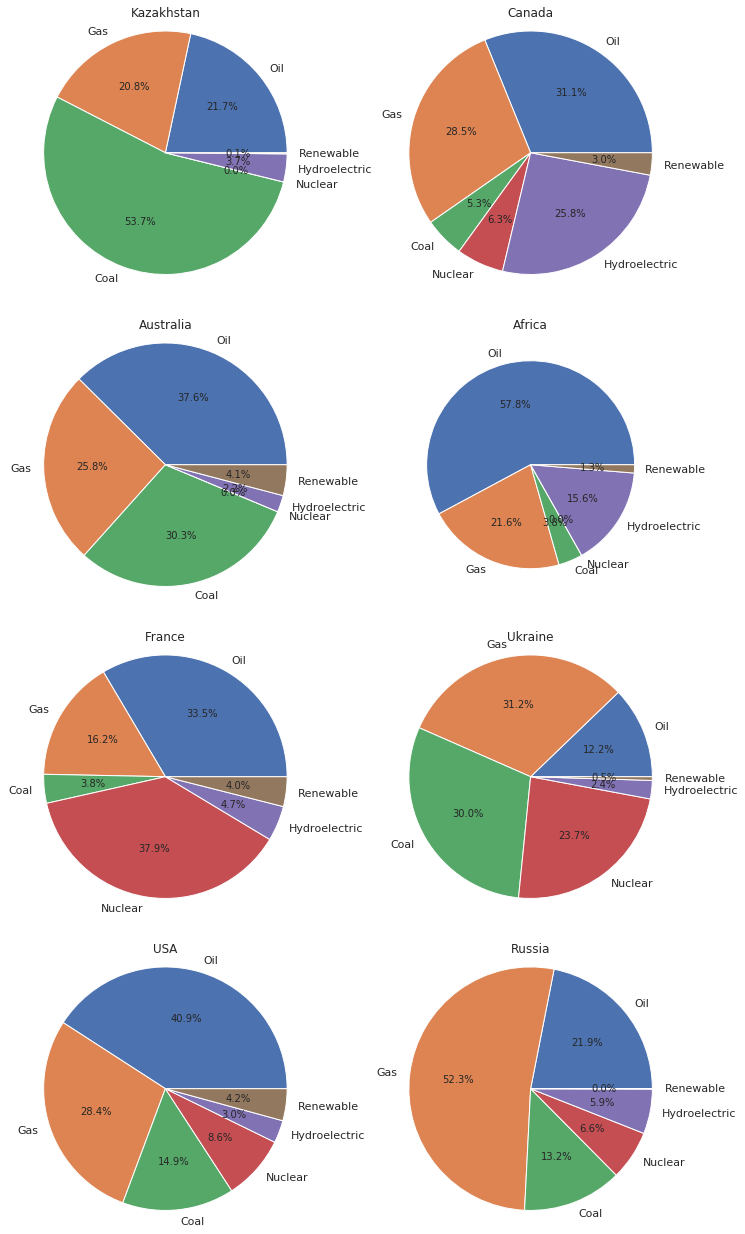

In [11]:
Labels = ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", "Renewable"]
KAZ = conv2017[40]
USA = conv2017[2]
CANADA = conv2017[3]
AUS = conv2017[63]
AFRICA = conv2017[61]
CHINA = conv2017[65]
INDIA = conv2017[67]
FRANCE = conv2017[21]
UKRAINE = conv2017[43]
Russia = conv2017[41]

plt.figure(figsize=(12, 22))
ax1 = plt.subplot(4, 2, 1)
ax1.axis("equal")
ax1.set_title("Kazakhstan")
ax1.pie(KAZ[1:-1], labels=Labels, autopct="%1.1f%%")

ax2 = plt.subplot(4, 2, 2)
ax2.axis("equal")
ax2.set_title("Canada")
ax2.pie(CANADA[1:-1], labels=Labels, autopct="%1.1f%%")

ax3 = plt.subplot(4, 2, 3)
ax3.axis("equal")
ax3.set_title("Australia")
ax3.pie(AUS[1:-1], labels=Labels, autopct="%1.1f%%")

ax4 = plt.subplot(4, 2, 4)
ax4.axis("equal")
ax4.set_title("Africa")
ax4.pie(AFRICA[1:-1], labels=Labels, autopct="%1.1f%%")

ax5 = plt.subplot(4, 2, 5)
ax5.axis("equal")
ax5.set_title("France")
ax5.pie(FRANCE[1:-1], labels=Labels, autopct="%1.1f%%")

ax6 = plt.subplot(4, 2, 6)
ax6.axis("equal")
ax6.set_title("Ukraine")
ax6.pie(UKRAINE[1:-1], labels=Labels, autopct="%1.1f%%")

ax7 = plt.subplot(4, 2, 7)
ax7.axis("equal")
ax7.set_title("USA")
ax7.pie(USA[1:-1], labels=Labels, autopct="%1.1f%%")

ax8 = plt.subplot(4, 2, 8)
ax8.axis("equal")
ax8.set_title("Russia")
ax8.pie(Russia[1:-1], labels=Labels, autopct="%1.1f%%")

plt.show()

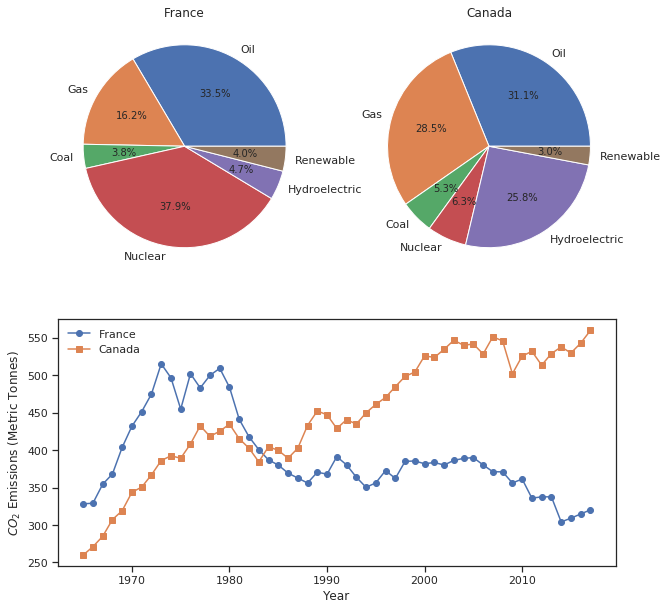

In [12]:
CO2_France = co2_time[28]
CO2_Ukraine = co2_time[59]
CO2_China = co2_time[89]
CO2_India = co2_time[91]
CO2_Kaz = co2_time[56]
CO2_aus = co2_time[87]
CO2_africa = co2_time[85]
CO2_canada = co2_time[2]
Time = np.arange(1965, 2018)

import matplotlib.gridspec as gridspec

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(10, 10))
ax1 = plt.subplot(gs[0, 0]) # row 0, col 0
ax2 = plt.subplot(gs[0, 1]) # row 0, col 1
ax3 = plt.subplot(gs[1, :]) # row 1, span all columns

ax1.axis("equal")
ax1.set_title("France")
ax1.pie(FRANCE[1:-1], labels=Labels, autopct="%1.1f%%")

ax2.axis("equal")
ax2.set_title("Canada")
ax2.pie(CANADA[1:-1], labels=Labels, autopct="%1.1f%%")

ax3.plot(Time, CO2_France[1:-3], label="France", marker="o")
ax3.plot(Time, CO2_canada[1:-3], label="Canada", marker="s")
ax3.set_ylabel("$CO_2$ Emissions (Metric Tonnes)")
ax3.set_xlabel("Year")
ax3.legend(frameon=False)

plt.savefig("Figures/Figure_5", dpi=600)

plt.show()